
TFG

Este es el codigo del tfg de Borja Jimeno

En esta primera celda vamos a definir todas las funciones y variables que necesitaremos para calcular el ritmo teórico. Cada función está explicada al inicio y cada variable tiene asociadas sus unidades en un comentario a la derecha.  

Para la realización de las funciones se ha tomado como referencia:  
-El pdf ('rateTutorial_MMartinez_TAE25.pdf)    
-El capítulo 7 de la Tesis de María ('tesisMaria_chap7.pdf')   
-El artículo 'Inelastic and Elastic Scattering of 187-Mev Electrons from Selected Even-Even Nuclei - Richard Helm - PHISICAL REVIEW VOLUME 104, NUMBER 5 DECEMBER 1, 1956'  
-Para calcular el Quenching Factor, Sección 4.3.2 de la tesis de Tamara Pardo Yanguas ('Tesis-Tamara.pdf')

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm

from funciones_ritmo_teorico import*
from funciones_ritmo_exp import*


plt.rcParams['font.size'] = 18



/tmp/ipykernel_19240/40686469.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_19240/40686469.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


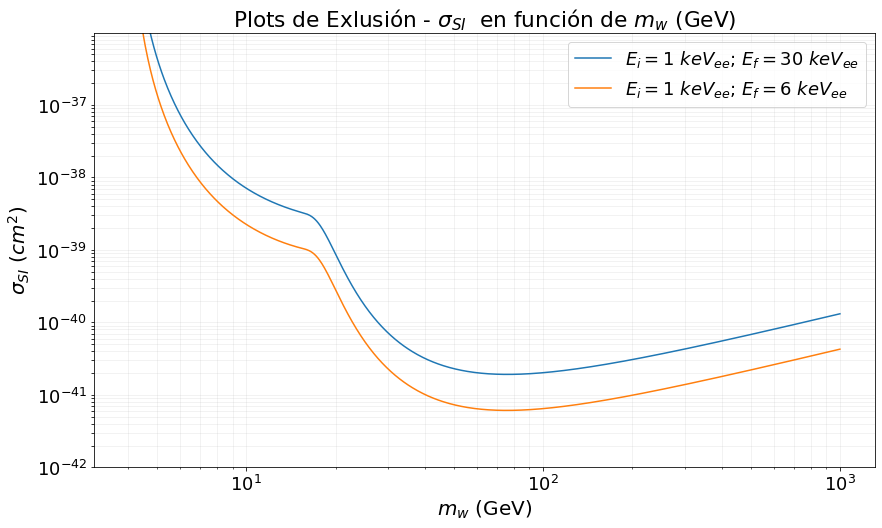

In [2]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW_min=0.1 #masa wimp minima en GeV
mW_max=3

mWs=np.logspace(mW_min,mW_max,num=1000,endpoint=True)

plt.figure(figsize=(14, 8))
ax = plt.subplot()

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()
#Calculamos función Ritmo teorico

Ei=1
Ef=30

ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)


sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")

Ei=1
Ef=6

ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")
ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-42

ax.set_ylim(y_inf,y_sup)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


/tmp/ipykernel_19240/548418215.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_19240/548418215.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


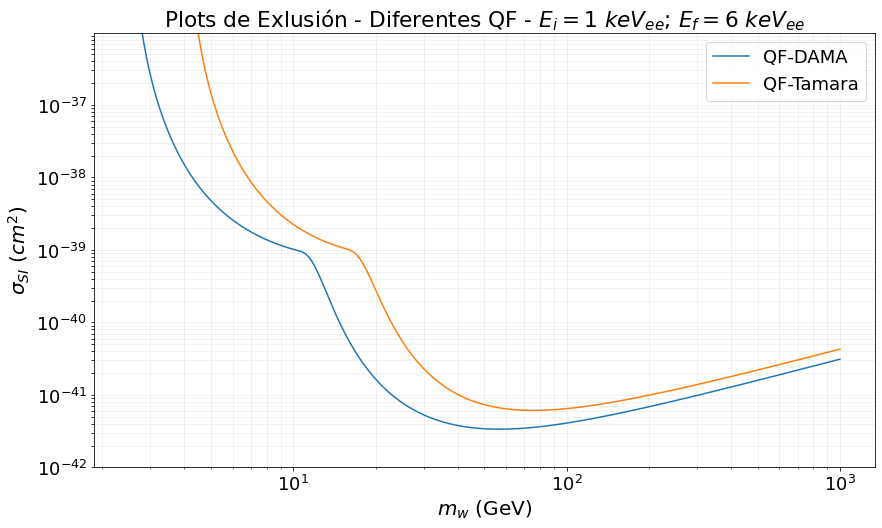

In [3]:
from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.ticker import FuncFormatter
timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW_min=0.1 #masa wimp minima en GeV
mW_max=3

mWs=np.logspace(mW_min,mW_max,num=1000,endpoint=True)

plt.figure(figsize=(14, 8))
ax = plt.subplot()

#Calculamos función Ritmo teorico

Ei=1
Ef=6

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()

ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.plot(mWs,sigma_sis,label="QF-DAMA")

Ei=1
Ef=6

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()

ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.plot(mWs,sigma_sis,label="QF-Tamara")
ax.legend()
ax.set_title(r'Plots de Exlusión - Diferentes QF - $E_i=1$ $keV_{ee}$; $E_f=6$ $keV_{ee}$')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-42

ax.set_ylim(y_inf,y_sup)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


In [4]:

E_min=1
E_max=6.1

ventana_min=1       #Anchura minima de la ventana de integracion (keV_ee)
refinado=0.1          #Valor del espaciado minimo de la rejilla Minimo 0.1 keV_ee

es=np.arange(E_min,E_max,refinado)
energias_i=es


    
print(energias_i)

aux=np.zeros(3)
lista_var_e=[]
for i in energias_i:

    energias_f=[]
    for j in es:
        if(j>=i+ventana_min):
            energias_f.append(j)
    energias_f=np.array(energias_f)     
        
    for j in energias_f:

        Ei=aux[0]=i
        Ef=aux[1]=j

        tiempo_exposicion=calcula_t_exposicion()
        masa_exposicion=calcula_m_exposicion()

        ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
        sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

        print(min(sigma_sis))
        aux[2]=min(sigma_sis)
        print(aux)
        lista_var_e.append(aux.copy())

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6. ]


/tmp/ipykernel_18284/380485383.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


2.187719396273011e-42
[1.0000000e+00 2.0000000e+00 2.1877194e-42]
2.2768417478380097e-42
[1.00000000e+00 2.10000000e+00 2.27684175e-42]
2.3686510025000218e-42
[1.000000e+00 2.200000e+00 2.368651e-42]
2.461193445133036e-42
[1.00000000e+00 2.30000000e+00 2.46119345e-42]
2.5594191646468635e-42
[1.00000000e+00 2.40000000e+00 2.55941916e-42]
2.659634651632851e-42
[1.00000000e+00 2.50000000e+00 2.65963465e-42]
2.7641754126467148e-42
[1.00000000e+00 2.60000000e+00 2.76417541e-42]
2.874637769878911e-42
[1.00000000e+00 2.70000000e+00 2.87463777e-42]
2.991654550288311e-42
[1.00000000e+00 2.80000000e+00 2.99165455e-42]
3.111397470590715e-42
[1.00000000e+00 2.90000000e+00 3.11139747e-42]
3.236453452977309e-42
[1.00000000e+00 3.00000000e+00 3.23645345e-42]
3.363725930877918e-42
[1.00000000e+00 3.10000000e+00 3.36372593e-42]
3.491819585172533e-42
[1.00000000e+00 3.20000000e+00 3.49181959e-42]
3.620288269779428e-42
[1.00000000e+00 3.30000000e+00 3.62028827e-42]
3.747143752416726e-42
[1.00000000e+00 3

In [4]:
datos_variacion_energias=np.array(lista_var_e)
np.savetxt("Datos/array_minimos.txt",datos_variacion_energias,delimiter=";")
print(datos_variacion_energias)

NameError: name 'lista_var_e' is not defined

In [5]:

E_min=1
E_max=6.1

ventana_min=1       #Anchura minima de la ventana de integracion (keV_ee)
refinado=0.1          #Valor del espaciado minimo de la rejilla Minimo 0.1 keV_ee

energias_i=np.arange(E_min,E_max,refinado)


comb=np.zeros((9),dtype=int)
lista=[]
for i1 in range (2):
    for i2 in range (2):
        for i3 in range (2):
            for i4 in range (2):
                    for i5 in range (2):
                        for i6 in range (2):
                            for i7 in range (2):
                                for i8 in range (2):
                                     comb[0]=i1
                                     comb[1]=i2
                                     comb[2]=i3
                                     comb[3]=i4
                                     comb[4]=i5
                                     comb[5]=i6
                                     comb[6]=i7
                                     comb[7]=i8
                                     lista.append(comb.copy())

lista2=[]
for j in range (len(lista)):
    if j>0:
         lista2.append(lista[j].copy())
     
array_detectores=np.array(lista2)                       
                                     
                                     
print(array_detectores)


[[0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 0]
 ...
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 1 1 0]]


In [7]:

lista_var_det=np.zeros(len(array_detectores))

Ei=1
Ef=6

for i in range(len(array_detectores)):
    tiempo_exposicion=calcula_t_exposicion(array_detectores[i])
    masa_exposicion=calcula_m_exposicion(array_detectores[i])

    ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=array_detectores[i])
    sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

    #print(min(sigma_sis))
    lista_var_det[i]=min(sigma_sis)

/tmp/ipykernel_19240/1072837613.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


In [ ]:
plt.figure(figsize=(14, 8))
ax = plt.subplot()
x=np.arange(0,len(array_detectores),1)
ax.plot(x,lista_var_det)

In [19]:
datos_variacion_detectores=lista_var_det
np.savetxt("Datos/array_minimos_detectores.txt",datos_variacion_detectores,delimiter=";")
print(datos_variacion_detectores)


[5.30437699e-43 5.66683077e-43 1.09554611e-42 6.94786615e-43
 1.22356519e-42 1.25978388e-42 1.78883371e-42 6.50953707e-43
 1.17976045e-42 1.21597939e-42 1.74503653e-42 1.34399610e-42
 1.87303266e-42 1.90924527e-42 2.43836940e-42 7.48324740e-43
 1.27706929e-42 1.31328772e-42 1.84232860e-42 1.44130282e-42
 1.97032408e-42 2.00653651e-42 2.53565402e-42 1.39749935e-42
 1.92652732e-42 1.96273983e-42 2.49186024e-42 2.09073453e-42
 2.61984670e-42 2.65605670e-42 3.18521313e-42 5.35743950e-43
 1.06462852e-42 1.10084818e-42 1.62992487e-42 1.22886715e-42
 1.75792187e-42 1.79413471e-42 2.32326663e-42 1.18506245e-42
 1.71412461e-42 1.75033754e-42 2.27947261e-42 1.87833364e-42
 2.40745979e-42 2.44366998e-42 2.97283395e-42 1.28237122e-42
 1.81141686e-42 1.84762959e-42 2.37675764e-42 1.97562504e-42
 2.50474448e-42 2.54095458e-42 3.07011496e-42 1.93182828e-42
 2.46095068e-42 2.49716082e-42 3.02632277e-42 2.62514726e-42
 3.15430471e-42 3.19051348e-42 3.71969412e-42 9.80876574e-43
 1.50949846e-42 1.545715